Anna MARIZY & Loan SARAZIN

# Implémentation du filtre de Kalman 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #loi normale
import time

## Estimation de trois constantes 

In [2]:
C1, C2, C3 = 1, 5, -4
Q = 1e-2
R = 2

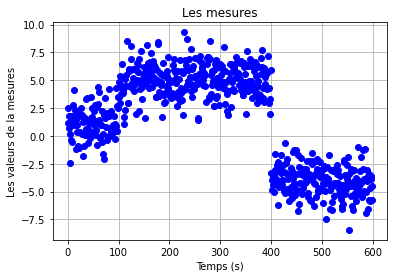

In [3]:
z1 = norm.rvs(loc = C1, scale = np.sqrt(R), size = 100)
z2 = norm.rvs(loc = C2, scale = np.sqrt(R), size = 300)
z3 = norm.rvs(loc = C3, scale = np.sqrt(R), size = 200)
z = np.concatenate((z1, z2, z3))

t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

Hypothèses 

- Modèle discret et linéaire 
    Hypothèse Linéaire Gaussienne 
    $x(k+1) = F(k)x(k) + G(k)u(k) + v(k)$  
    
    Le bruit d'état $v(k)$ est gaussien de moyenne nulle.

In [36]:
def Kalman_filter(Q, R, z) : 
    '''
    Implémentation de la méthode du filtre de Kalman 
    
    Args: 
        Q : covariance du bruit sur l'état
        R : variance des mesures, ie bruit sur les mesures 
        z : mesures
    
    Returns: 
        xh : array contenant les estimations des états
    '''
    
    #Initialisation
    xh = np.zeros(shape = len(z))
    x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
    P = np.zeros(shape = len(z))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q #Ajout de la covariance du bruit
    
    for p in range(0, len(z), 1):
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (z[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(z) - 1:
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
    
    return xh, P

### Expérimentation en faisant varier les valeurs des paramètres

In [37]:
#Comparaison des résultats pour différentes valeurs de Q 
xh_1, P_1 = Kalman_filter(Q, R, z)

In [38]:
Q2 = 10**(-5)
xh_2, P_2 = Kalman_filter(Q2, R, z)

Q3 = 1
xh_3, P_3 = Kalman_filter(Q3, R, z)

Q4 = 10
xh_4, P_4 = Kalman_filter(Q4, R, z)

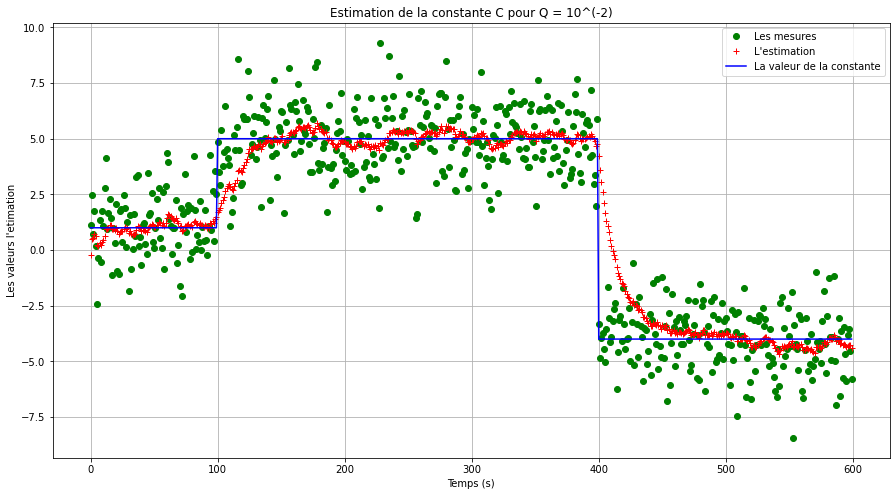

In [39]:
#Plot de l'estimation de l'état avec l'algortithme du filtre de Kalman
un1 = C1*np.ones(shape=len(z1))
un2 = C2*np.ones(shape=len(z2))
un3 = C3*np.ones(shape=len(z3))
un = np.concatenate((un1, un2, un3))

plt.figure(figsize = (15, 8))
plt.plot(t, z, 'go', label = 'Les mesures')
plt.plot(t, xh_1, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C pour Q = 10^(-2)')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

L'estimation, tracée en rouge ci-dessus, est assez proche de la valeur réelle de la constante (qui correspond à une 'concaténation' des trois constantes C1, C2, C3 sur leur intervalles. 

On peut remarquer que le filtre est incorrect aux frontières des changements de constantes. En effet, au voisinage des décrochements, le modèle 'est plus linéaire, ce qui explique les difficultés d'estimation du filtre.

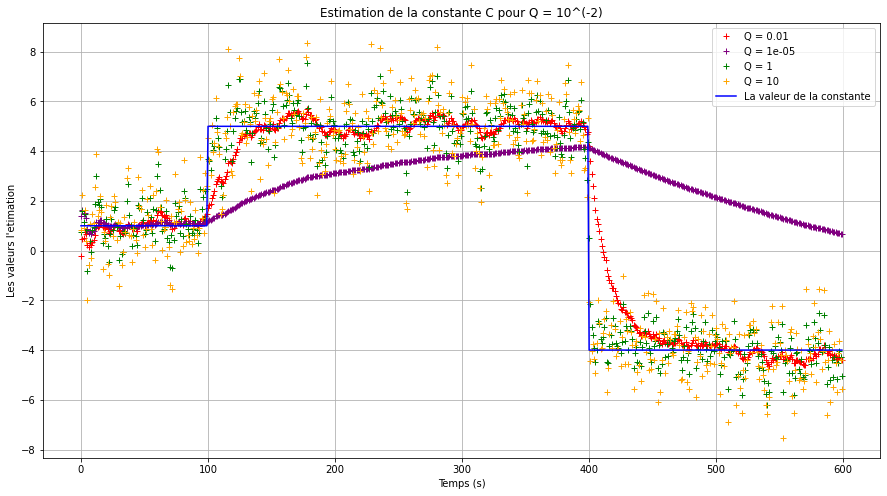

In [40]:
un1 = C1*np.ones(shape=len(z1))
un2 = C2*np.ones(shape=len(z2))
un3 = C3*np.ones(shape=len(z3))
un = np.concatenate((un1, un2, un3))

plt.figure(figsize = (15, 8))
#plt.plot(t, z, 'o', color = "skyblue", label = 'Les mesures')
plt.plot(t, xh_1, 'r+', label = f'Q = {10**-2}')
plt.plot(t, xh_2, '+', color = 'purple', label = f'Q = {10**(-5)}')
plt.plot(t, xh_3, '+', color = 'green', label = f'Q = {1}')
plt.plot(t, xh_4, '+', color = 'orange', label = f'Q = {10}')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C pour Q = 10^(-2)')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

On peut remarquer que plus le bruit sur l'état augmente, plus l'estimation se rapproche des mesures. Avec un Q grand (exemple : 100) on a même une estimation de l'état qui est exactement les mesures. L'erreur est pas conséquent grande, car l'erreur est mesurée par rapport à la valeur de la constante.

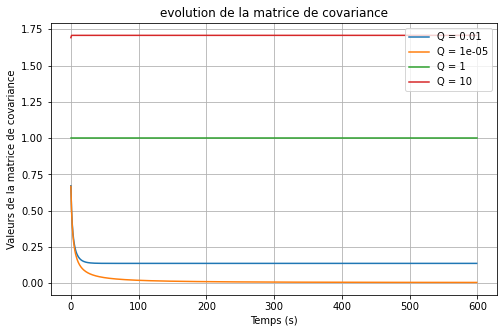

In [49]:
#PLot de l'évolution de la matrice de covariance
plt.figure(figsize = (8, 5))
plt.plot(t, P_1,label = f'Q = {10**(-2)}')
plt.plot(t, P_2, label = f'Q = {10**(-5)}')
plt.plot(t, P_3, label = f'Q = {1}')
plt.plot(t, P_4, label = f'Q = {10}')
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.legend()
plt.grid()
plt.show()

On peut remarquer que plus le bruit Q augmente, plus la covariance tend vers l'écart-type R des mesures fixé au départ (valeur de 2).  
A l'inverse quand Q est petit, on a une convergence empirique vers Q.

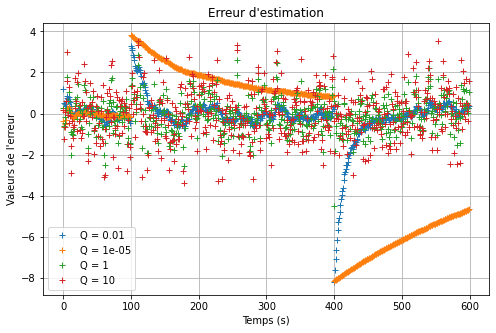

In [48]:
#Plot de l'erreur d'estimation ie la différence entre l'état et son estimation 
plt.figure(figsize = (8, 5))
plt.plot(t, un - xh_1, '+', label = f'Q = {10**(-2)}')
plt.plot(t, un - xh_2, '+', label = f'Q = {10**(-5)}')
plt.plot(t, un - xh_3, '+', label = f'Q = {1}')
plt.plot(t, un - xh_4, '+', label = f'Q = {10}')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.legend()
plt.grid()
plt.show()

# Filtre de Kalman étendu et filtre de Kalman sans parfum

Pour traiter des cas où le système est non linéaire mais où les hypothèses de gaussianité sont toujours satisfaites. Cependant on ne peut plus postuler que le solution obtenue est optimale. 

Une autre solution possible est le filtre de Kalman sans parfum (UKF). Ce filtre propose une méthode qui évite la linéarisation à chaque étape de calcul.



## Filtre de Kalman étendu

Le principe du filtre de Kalman étendu (ou EKF) est de linéariser localement les équations. Pour cela nous avons besoin de calculer, à chaque nouvel échantillon traité, les matrices de dérivées partielles (jacobiennes). Ensuite, il faut appliquer les équations du filtre de Kalman classique en utilisant les jacobiennes calculées. 

La statbilité est cependant locale et non plus globale. La stabilité de l'ensemble de l'estimation est donc très sensible aux paramètres d'initialisation. 

Nous avons besoin de calculer la matrice Jacobienne des équations d'état puis la matrice Jacobienne de la fonction f.

In [ ]:
def Kalman_filter_Extended(Q, R, z) : 
    '''
    Implémentation de la méthode du filtre de Kalman étendu
    
    Args: 
        Q : covariance du bruit sur l'état
        R : variance des mesures, ie bruit sur les mesures 
        z : mesures
    
    Returns: 
        xh : array contenant les estimations des états
    '''
    
    #Initialisation
    xh = np.zeros(shape = len(z))
    x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
    P = np.zeros(shape = len(z))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q #Ajout de la covariance du bruit
    
    for p in range(0, len(z), 1):
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (z[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(z) - 1:
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
    
    return xh, P

### Cas où les hypothèses ne sont pas respectées
Dans le cas où les hypothèses de gaussianité ne sont pas satisfaites, on ne peut pas faire appel aux filtres de Kalman. Et cela même si le système est linéaire.

On utilise alors des méthode de simulation Monte Carlo. Cette méthode simule les densités de probabilités de $p(\theta | x)$ afin de calculer $E(\theta | x)$. 